In [1]:
import warnings
warnings.filterwarnings('ignore')

#### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   # visualization library

#### Read the dataset

In [3]:
df = pd.read_csv('Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## Feature Description
#### Store - Store num
#### Date - date of sales
#### Holiday flag  - 0(non holiday), 1(holiday)
#### temp - temp on day os sales
#### fuel_price - Cost of fuel in the region
#### CPI - Consumer Price Index
#### Unemployment - unemployment rate

In [4]:
df.shape  # (rows = 6435, cols=8)

(6435, 8)

### Data Preprocessing

#### 1) Handling Null Values

#### Treatment of Null Values
1) Drop the columns containing Null - when column is insignificant.<br>
2) Drop the rows containing Null - to be used when percentage of Null values < 5-7%.<br>
3) Fill the Null Values<br>
a) If Column is Continuous :  Mean of Median<br>
b) If Column is Categorical : Mode<br>
c) If data is Time Series : Use bfill(backward fill) or ffill(forward fill)

In [5]:
# Weight(56,62.5,67.8,90,.....), Gender(M,F,O,M,F,O....)

In [10]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

#### Inference
There are no null values

#### 2) Handling Duplicates

In [11]:
df.duplicated().sum()

0

#### Inference
There are no duplicate rows

#### 3) Check the data types

In [13]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [16]:
df['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [17]:
print(df['Date'].min(),df['Date'].max())

2010-01-10 00:00:00 2012-12-10 00:00:00


In [18]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


#### Feature Engineering  - Creating new feature out of Exsiting dataset

In [19]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [20]:
# dt = datetime
df['Year'] = df['Date'].dt.year
df['Qtr'] = df['Date'].dt.quarter
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Qtr,Month,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,4,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,1,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,1,2,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,2,5,3


#### Separate Numerical and Categorical Features

In [21]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Qtr', 'Month', 'Day'],
      dtype='object')

In [23]:
num_cols = ['Weekly_Sales','Temperature','Fuel_Price', 'CPI', 
            'Unemployment']
cat_cols = ['Store','Holiday_Flag','Year','Qtr', 'Month', 'Day']

In [24]:
# Univariate
### Num_Cols - boxplot, histogram, 
### Cat_Cols - pie_chart, countplot

# Bivariate
# num-num - scatter_plot,pairplot
# num-cat - bar_chart,stripplot,swarmplot,boxplot,line_chart,kdeplot
# cat-cat - countplot,


## Univariate

#### Numerical

['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


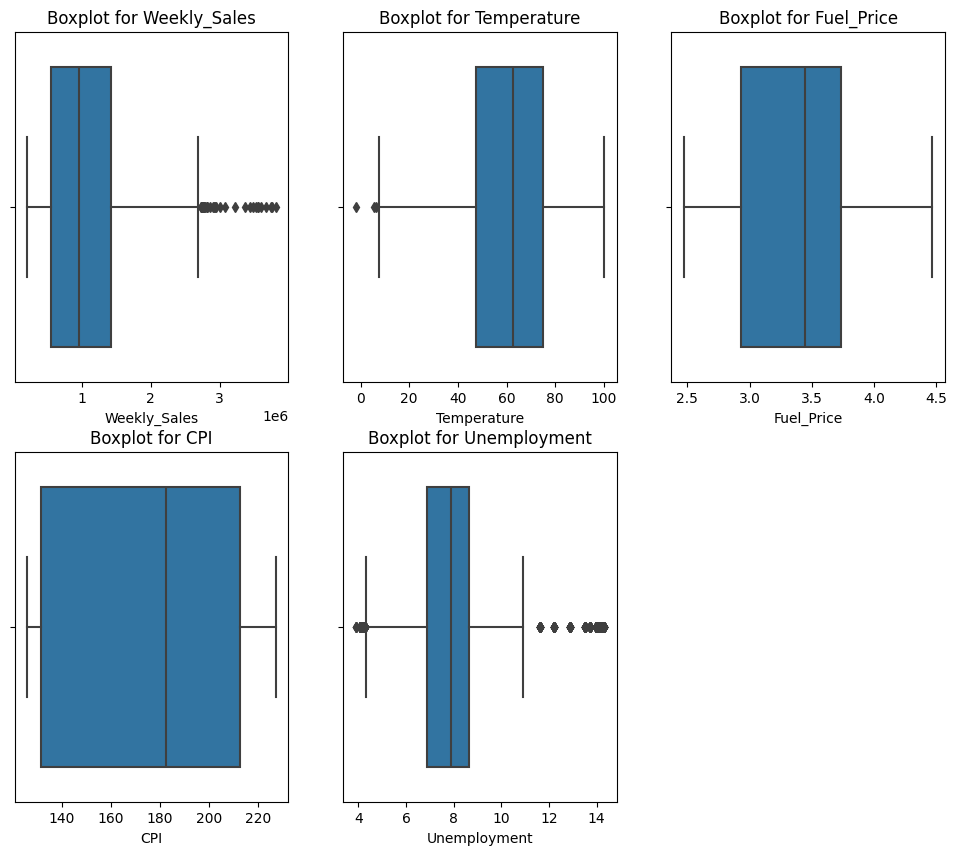

In [30]:
plt.figure(figsize=(12,10))  # => 2*3, 3*2
for i in range(len(num_cols)):  # i = 0,1,2,3,4
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df[num_cols[i]])
    plt.title(f'Boxplot for {num_cols[i]}')

plt.show()

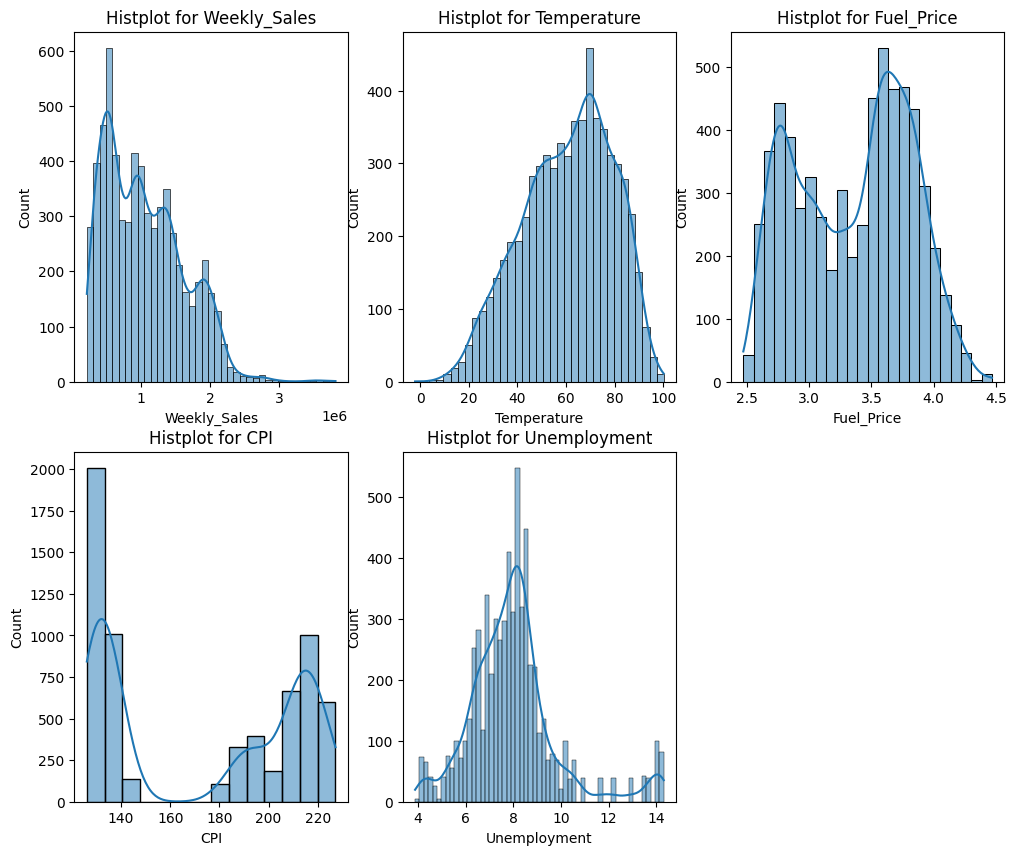

In [34]:
plt.figure(figsize=(12,10))  # => 2*3, 3*2
for i in range(len(num_cols)):  # i = 0,1,2,3,4
    plt.subplot(2,3,i+1)
    sns.histplot(x=df[num_cols[i]],kde=True)
    plt.title(f'Histplot for {num_cols[i]}')

plt.show()

# Skewness => lack of symmetry 

In [35]:
df['Year'].value_counts()

2011    2340
2010    2160
2012    1935
Name: Year, dtype: int64

#### Catgeorical 

['Store', 'Holiday_Flag', 'Year', 'Qtr', 'Month', 'Day']


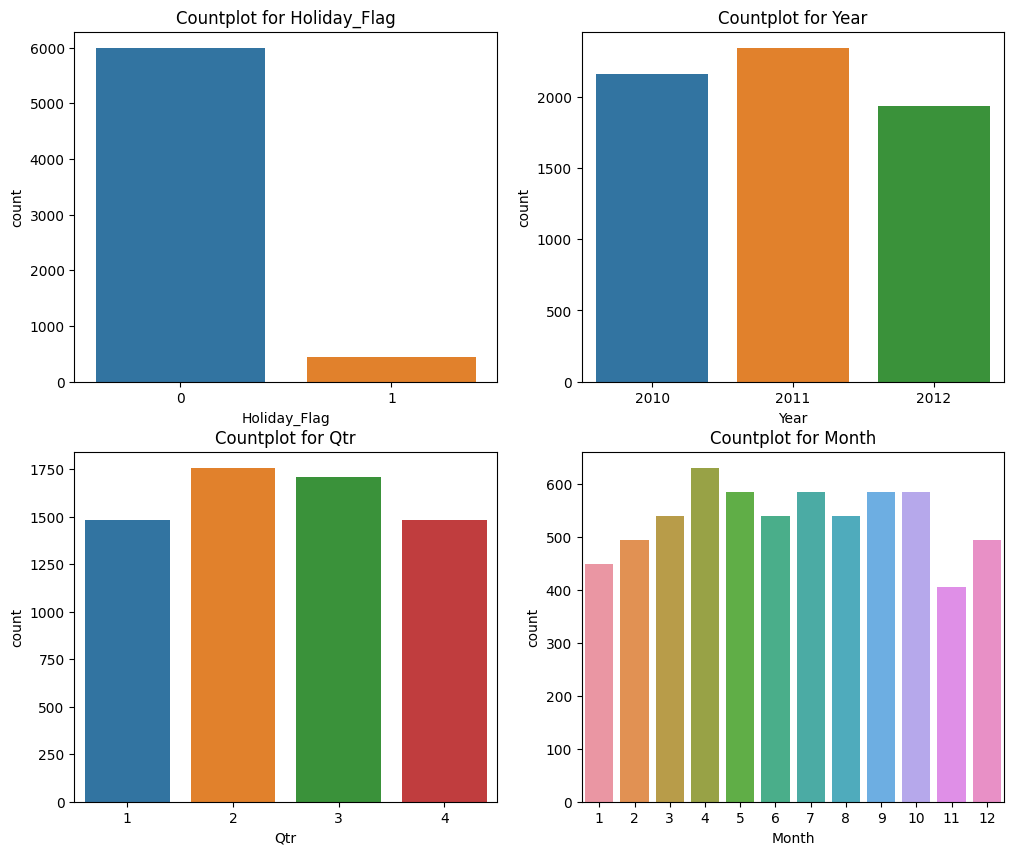

In [36]:
print(cat_cols)
cols = ['Holiday_Flag', 'Year', 'Qtr', 'Month']

plt.figure(figsize=(12,10))  # => 2*3, 3*2
for i in range(len(cols)):   # i = 0,1,2,3,4
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cols[i]])
    plt.title(f'Countplot for {cols[i]}')

plt.show()

['Store', 'Holiday_Flag', 'Year', 'Qtr', 'Month', 'Day']


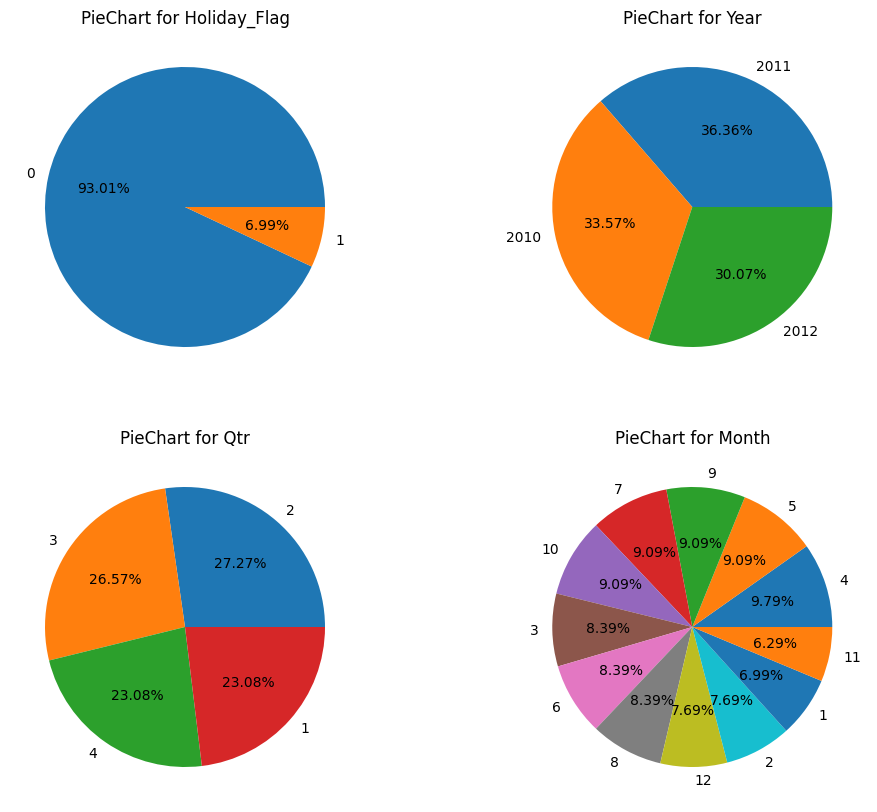

In [37]:
print(cat_cols)
cols = ['Holiday_Flag', 'Year', 'Qtr', 'Month']

plt.figure(figsize=(12,10))  # => 2*3, 3*2
for i in range(len(cols)):   # i = 0,1,2,3,4
    plt.subplot(2,2,i+1)
    r = df[cols[i]].value_counts()
    plt.pie(x=r.values,labels=r.index,autopct='%.2f%%')
    plt.title(f'PieChart for {cols[i]}')

plt.show()

## Bivariate Analysis

#### Cat-Cat

In [40]:
print(cat_cols)

['Store', 'Holiday_Flag', 'Year', 'Qtr', 'Month', 'Day']


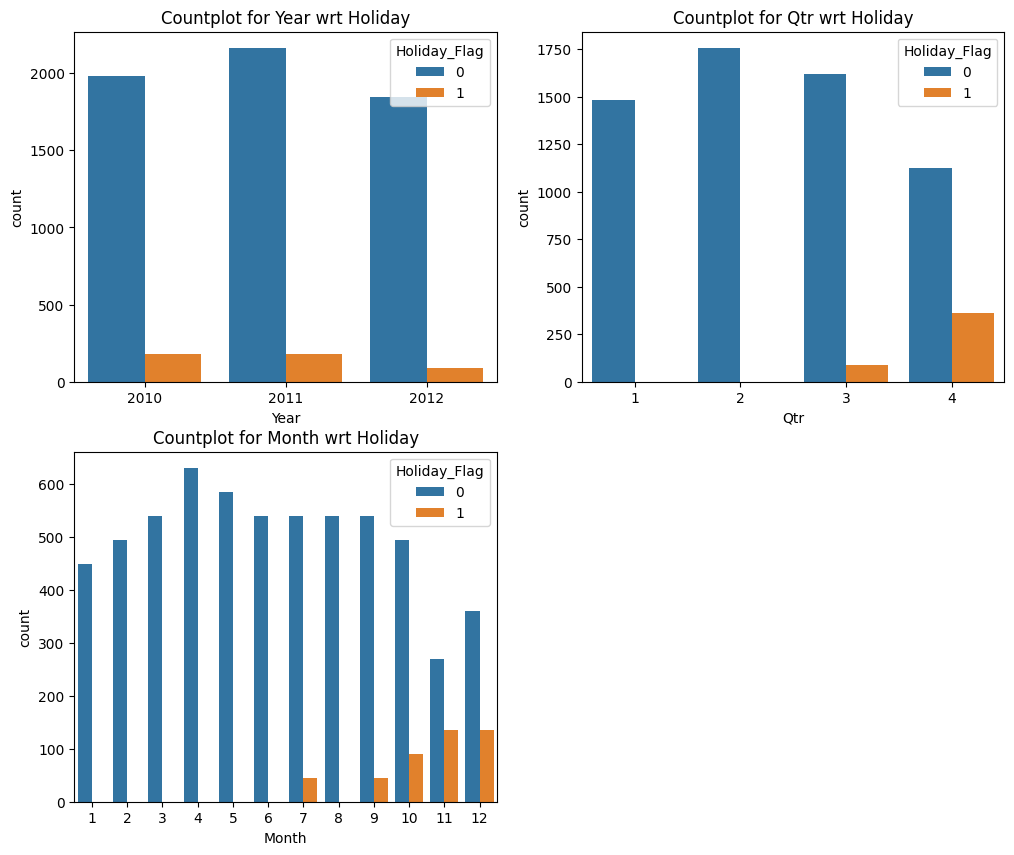

In [41]:
cols = ['Year', 'Qtr', 'Month']

plt.figure(figsize=(12,10))  # => 2*3, 3*2
for i in range(len(cols)):   # i = 0,1,2,3,4
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cols[i]],hue=df['Holiday_Flag'])
    plt.title(f'Countplot for {cols[i]} wrt Holiday')

plt.show()

#### Num-Cat

In [42]:
print(num_cols)
print(cat_cols)

['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
['Store', 'Holiday_Flag', 'Year', 'Qtr', 'Month', 'Day']


#### BoxPlot

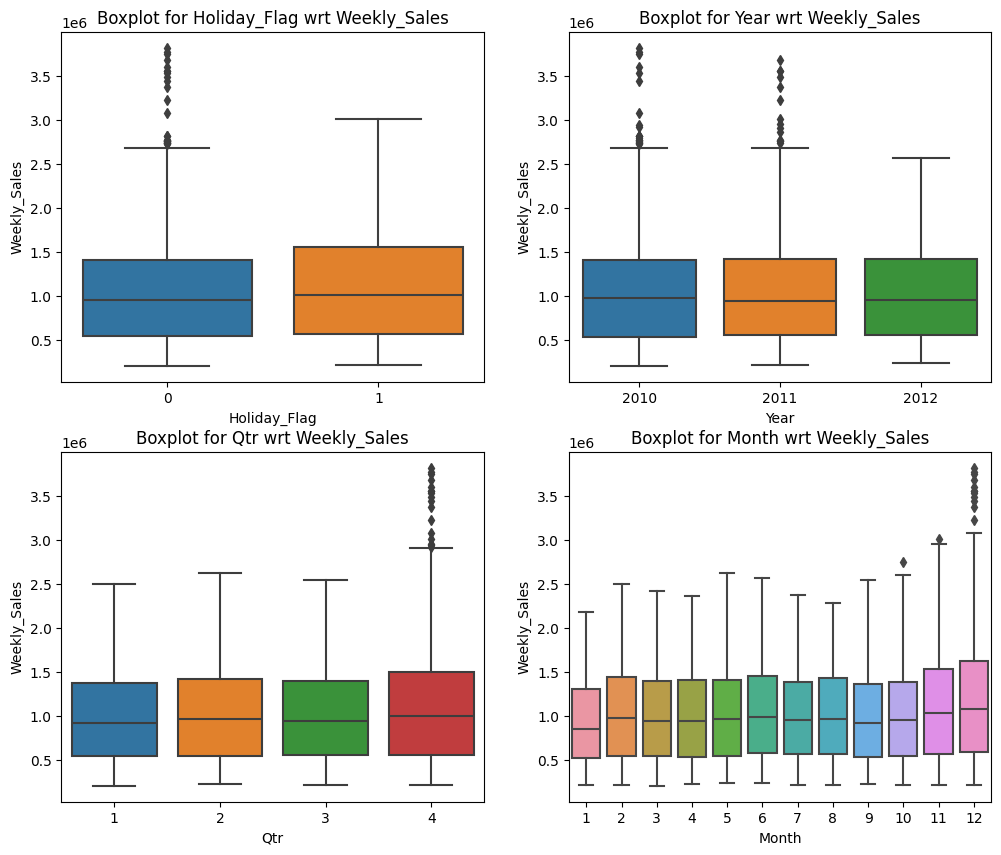

In [43]:
cols = ['Holiday_Flag','Year', 'Qtr', 'Month']

plt.figure(figsize=(12,10)) 
for i in range(len(cols)):  
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[cols[i]],y=df['Weekly_Sales'])  # Mean
    plt.title(f'Boxplot for {cols[i]} wrt Weekly_Sales')

plt.show()

#### Violinplot - Boxplot + KDE (kernel Density Estimate) (Histogram)

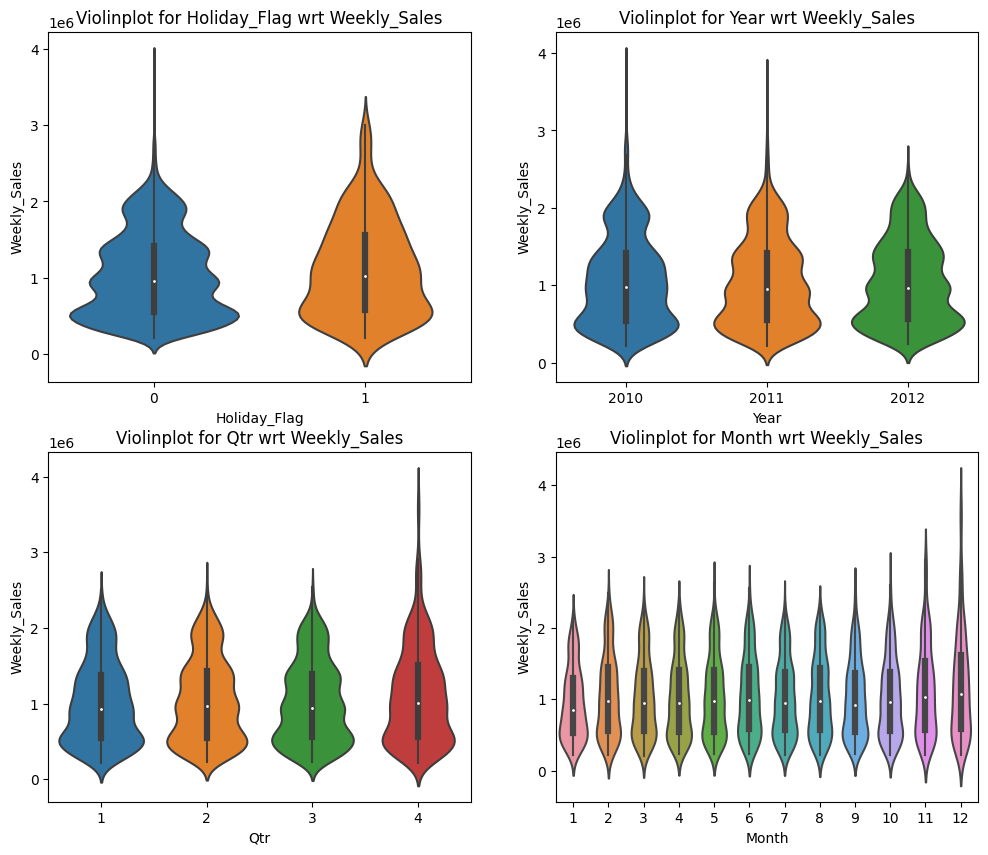

In [44]:
cols = ['Holiday_Flag','Year', 'Qtr', 'Month']

plt.figure(figsize=(12,10)) 
for i in range(len(cols)):  
    plt.subplot(2,2,i+1)
    sns.violinplot(x=df[cols[i]],y=df['Weekly_Sales'])  
    plt.title(f'Violinplot for {cols[i]} wrt Weekly_Sales')

plt.show()

#### Bar_Chart

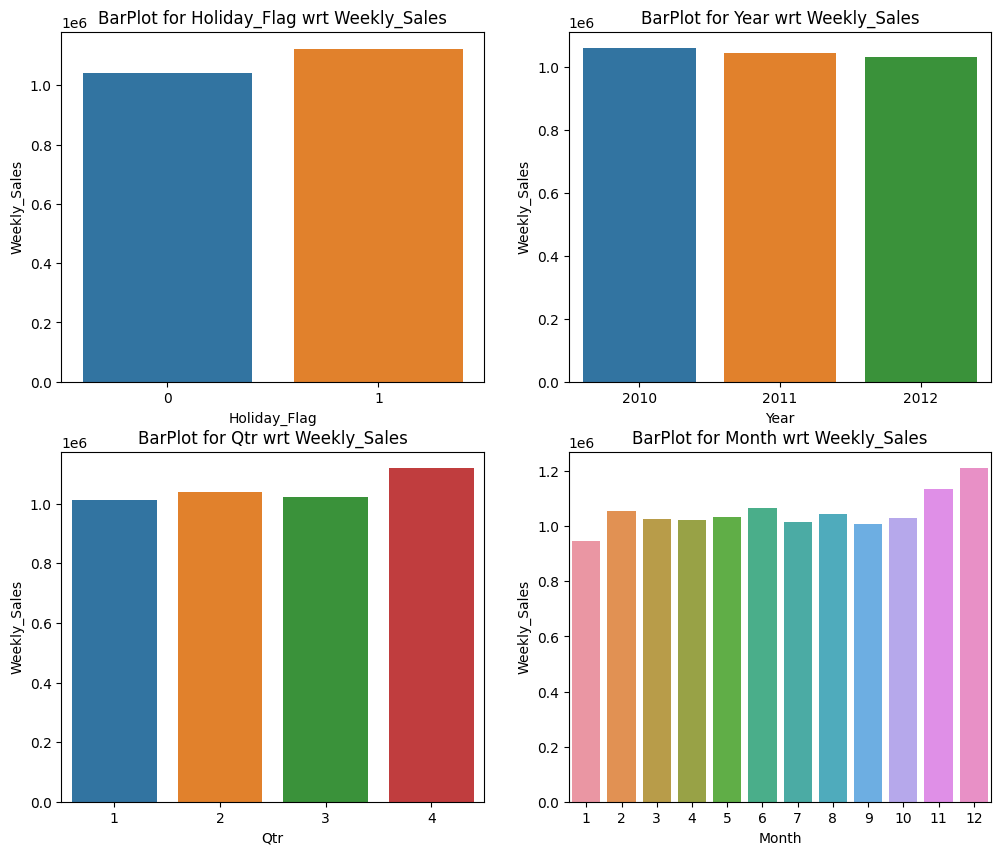

In [48]:
cols = ['Holiday_Flag','Year', 'Qtr', 'Month']

plt.figure(figsize=(12,10)) 
for i in range(len(cols)):  
    plt.subplot(2,2,i+1)
    sns.barplot(x=df[cols[i]],y=df['Weekly_Sales'],ci=0)  # Mean
    plt.title(f'BarPlot for {cols[i]} wrt Weekly_Sales')

plt.show()

In [51]:
r1 = df.groupby(['Qtr'])['Weekly_Sales'].median().reset_index()
r1

,Qtr,Weekly_Sales
0,1,923221.520
1,2,972373.810
2,3,946535.895
3,4,1002714.250


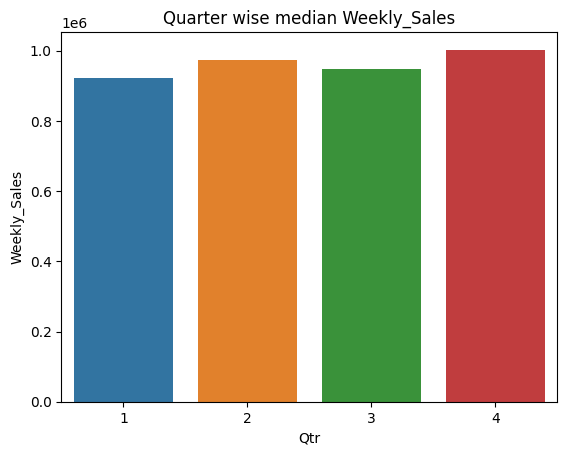

In [53]:
sns.barplot(x=r1['Qtr'],y=r1['Weekly_Sales'])  # Median
plt.title('Quarter wise median Weekly_Sales')
plt.show()

#### StripPlot

In [54]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Qtr', 'Month', 'Day'],
      dtype='object')

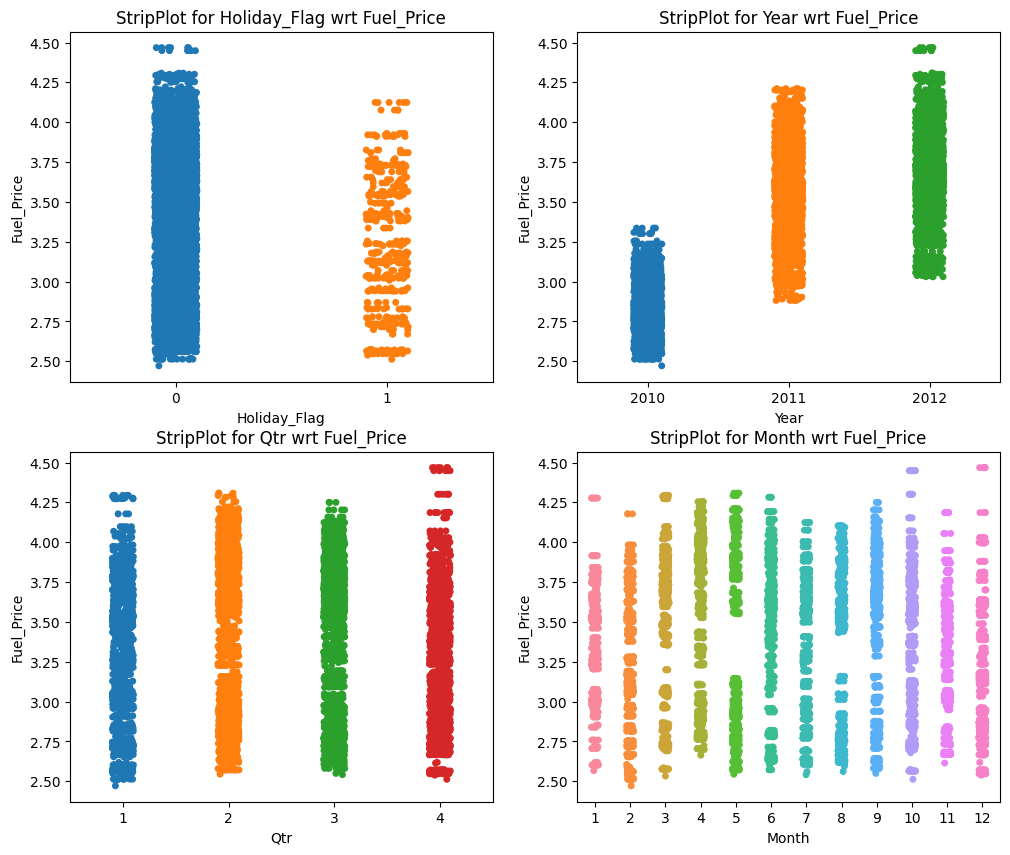

In [56]:
cols = ['Holiday_Flag','Year', 'Qtr', 'Month']

plt.figure(figsize=(12,10)) 
for i in range(len(cols)):  
    plt.subplot(2,2,i+1)
    sns.stripplot(x=df[cols[i]],y=df['Fuel_Price'])  
    plt.title(f'StripPlot for {cols[i]} wrt Fuel_Price')

plt.show()

#### Swarmplot

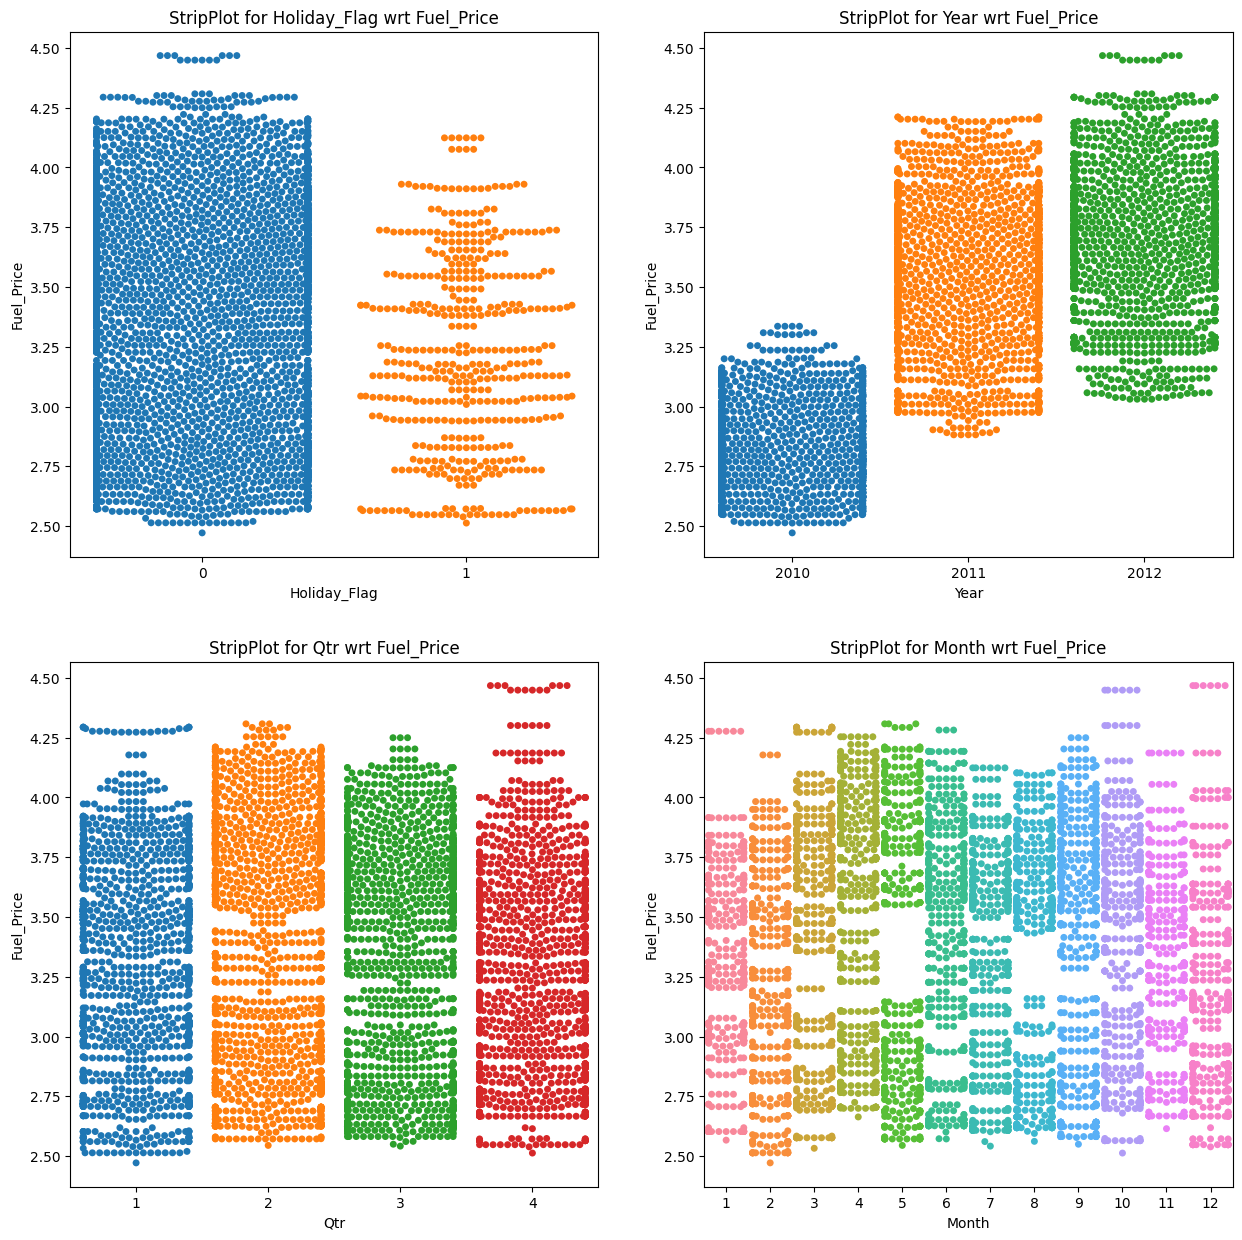

In [57]:
cols = ['Holiday_Flag','Year', 'Qtr', 'Month']

plt.figure(figsize=(15,15)) 
for i in range(len(cols)):  
    plt.subplot(2,2,i+1)
    sns.swarmplot(x=df[cols[i]],y=df['Fuel_Price'])  
    plt.title(f'Swarmplot for {cols[i]} wrt Fuel_Price')

plt.show()

#### KdePlot

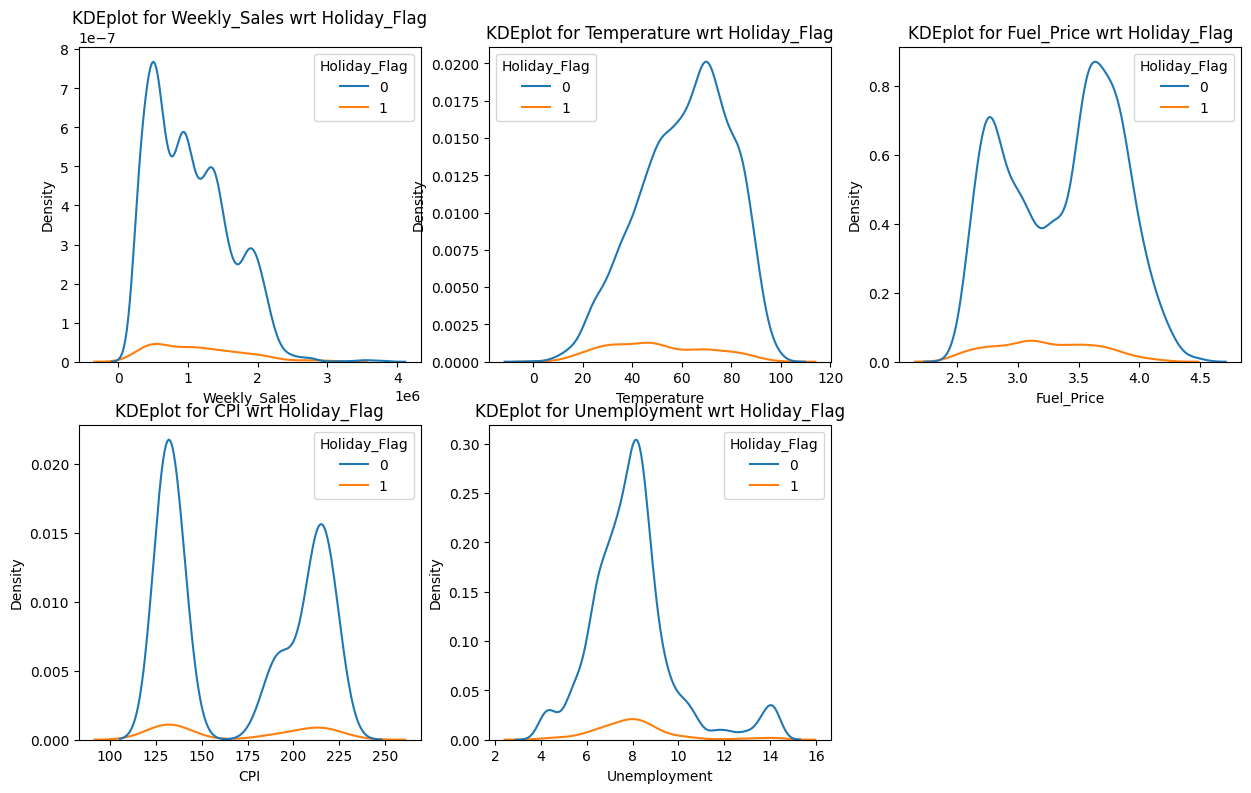

In [60]:
cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 
        'Unemployment']

plt.figure(figsize=(15,9)) 
for i in range(len(cols)):  
    plt.subplot(2,3,i+1)
    sns.kdeplot(x=df[cols[i]],hue=df['Holiday_Flag'])  
    plt.title(f'KDEplot for {cols[i]} wrt Holiday_Flag')

plt.show()

### Num-Num

#### ScatterPlot

In [62]:
num_cols

['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

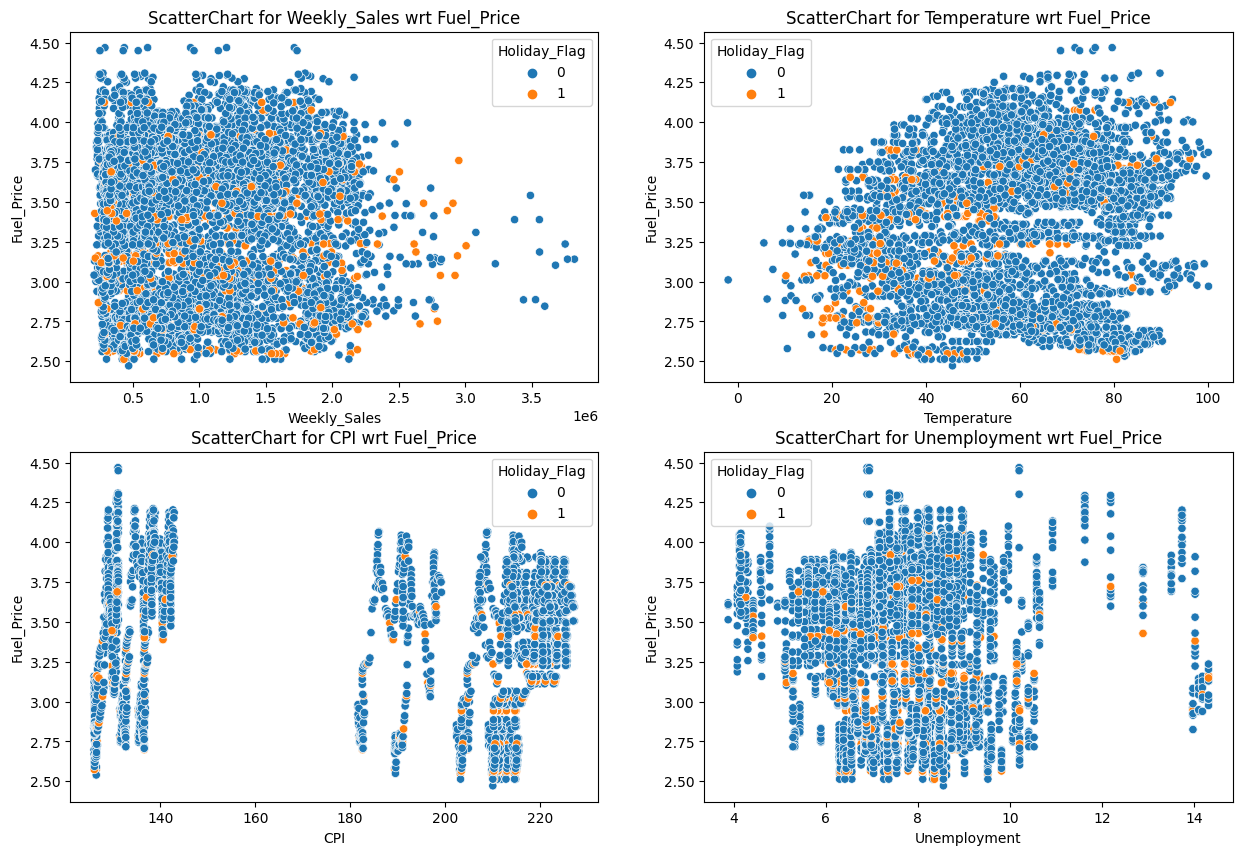

In [66]:
cols = ['Weekly_Sales', 'Temperature','CPI','Unemployment']

plt.figure(figsize=(15,10)) 
for i in range(len(cols)):  
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=df[cols[i]],y=df['Fuel_Price'],
                    hue=df['Holiday_Flag'])  
    plt.title(f'ScatterChart for {cols[i]} wrt Fuel_Price')

plt.show()

#### Boxplot

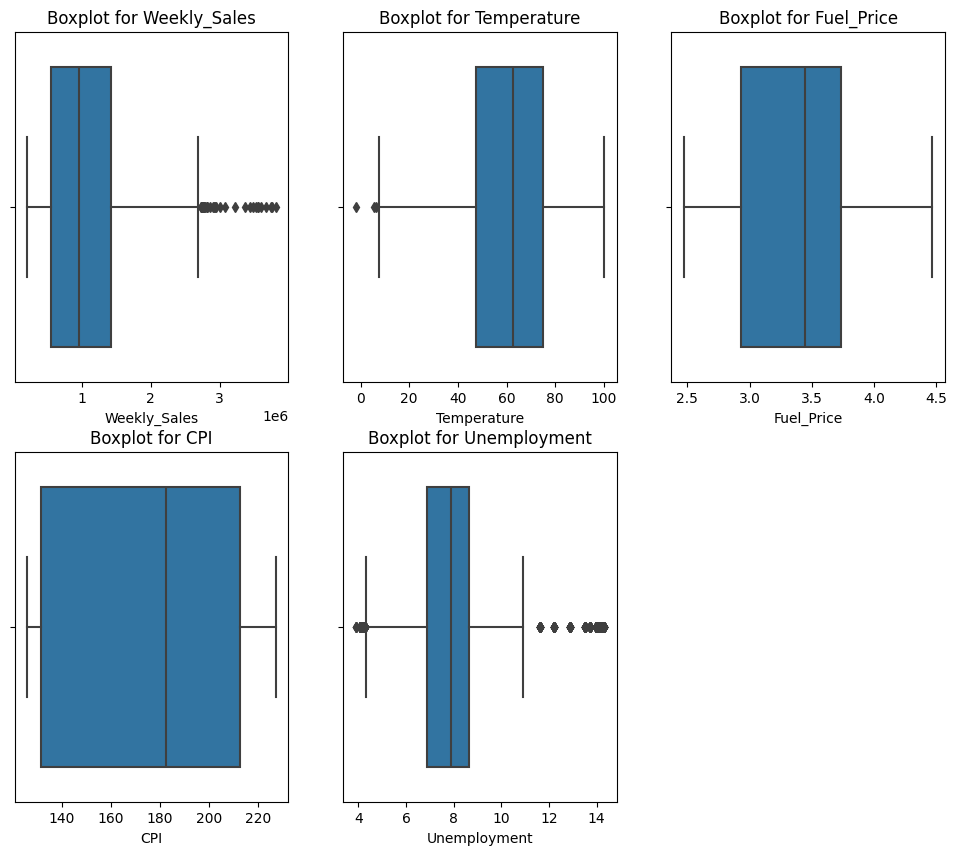

In [67]:
plt.figure(figsize=(12,10))  # => 2*3, 3*2
for i in range(len(num_cols)):  # i = 0,1,2,3,4
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df[num_cols[i]])
    plt.title(f'Boxplot for {num_cols[i]}')

plt.show()

In [ ]:
## Quantile - Dividing data into equal parts
## Quartile - It is a quantile in which we divide data into 4 equal parts (0.25,0.5,0.75)
## Decile   -  It is a quantile in which we divide data into 10 equal parts (0.1,0.2,0.3,...,0.9)
## Percentile - It is a quantile in which we divide data into 100 equal parts

### Outlier Treatment

In [74]:
for i in num_cols:
    q1 = df[i].quantile(0.25) # Q1
    q3 = df[i].quantile(0.75) # Q3
    iqr = q3 - q1
    bmin = q1 - 1.5*iqr
    bmax = q3 + 1.5*iqr
    print(i,q1,q3,bmin,bmax)
    df[i] = np.where(df[i]<bmin,bmin,df[i])
    df[i] = np.where(df[i]>bmax,bmax,df[i])

Weekly_Sales 553350.105 1420158.66 -746862.7275 2720371.4924999997
Temperature 47.46 74.94 6.240000000000002 116.16
Fuel_Price 2.933 3.735 1.7299999999999998 4.938
CPI 131.735 212.74329345 10.222559825000019 334.255733625
Unemployment 6.891 8.622 4.2945 11.218499999999999


In [73]:
w = np.array([10,12,15,14,17,20,24,27])
print(w)
w1 = np.where(w%3==0,w,'No')
print(w1)

[10 12 15 14 17 20 24 27]
['No' '12' '15' 'No' 'No' 'No' '24' '27']


#### After Outlier Treatment

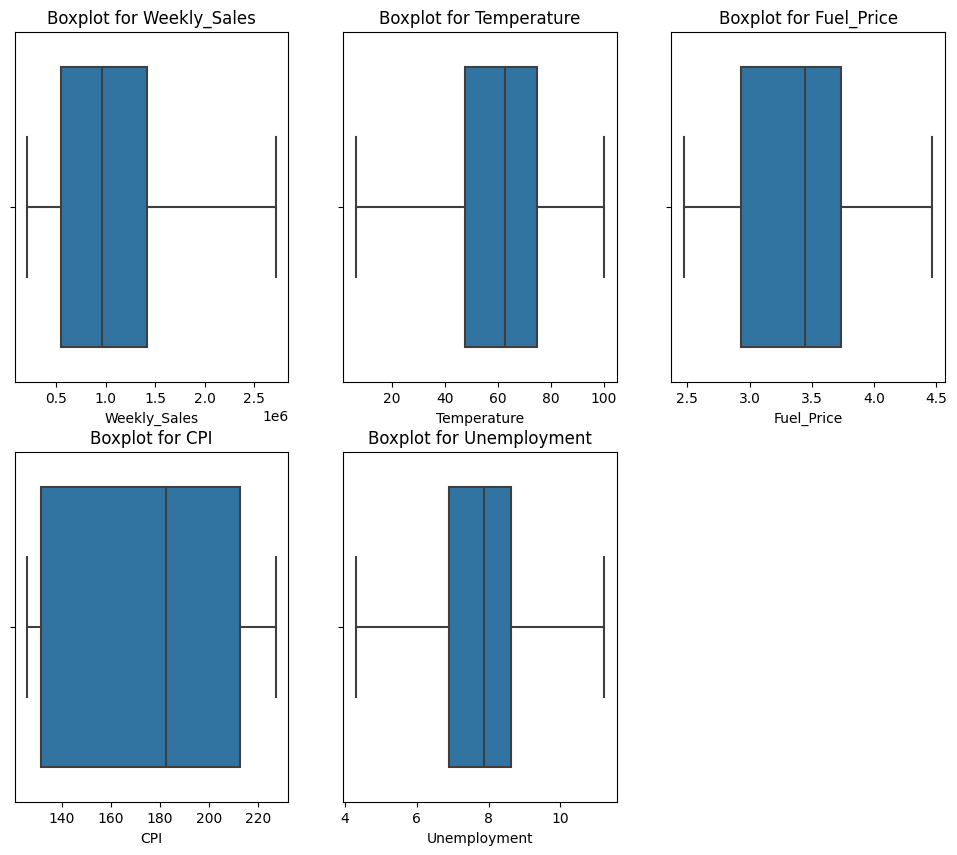

In [75]:
plt.figure(figsize=(12,10))  # => 2*3, 3*2
for i in range(len(num_cols)):  # i = 0,1,2,3,4
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df[num_cols[i]])
    plt.title(f'Boxplot for {num_cols[i]}')

plt.show()

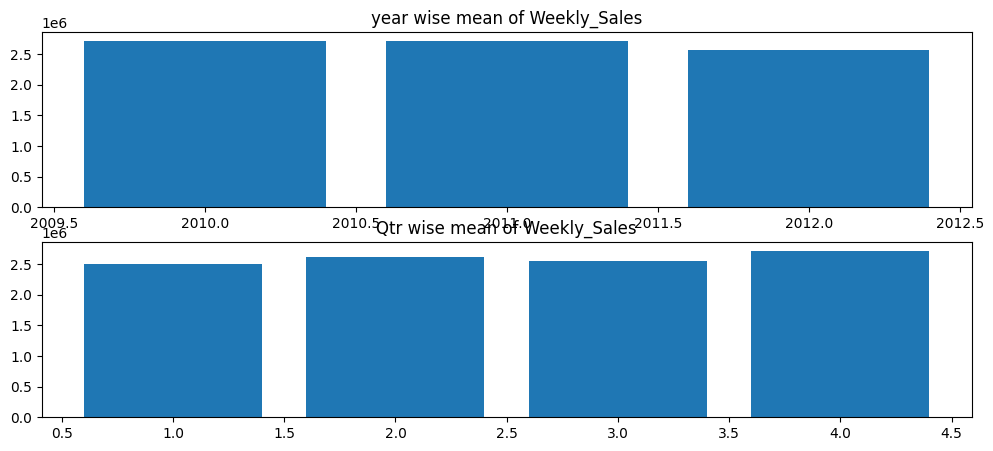

In [79]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))

ax1.bar(df['Year'],df['Weekly_Sales'])
ax1.set_title('year wise mean of Weekly_Sales')

ax2.bar(df['Qtr'],df['Weekly_Sales'])
ax2.set_title('Qtr wise mean of Weekly_Sales')

plt.show()